# Lead Score Assignment

#### Company X Education is an education company which sells online courses to industry professionals. They market their ads on websites and serach engines and from there user lands to their website. Users who gives their information like phone number or email id becaomes leads. These leads are then approached by the sales team to explain about the courses and then finaly some of the leads gets converted by buying the courses.

#### Although Company X Education receives a lot of leads its leads conversion rate is very poor. As a data scientist we have to identify the most potential leads aka 'Hot Leads' by calculating the lead score based on the KPIs and ML algorithm.


### Steps

1. import data, enquire data, clean data, (missing values, outliers, format issue)
2. Process data - handle missing values, outliers, categorical / numerical type conversion
3. EDA - univariate , bivariate with other predictors and target variables, multivariate analysis
4. Defining parameters for model, scaling, train test split
5. Feature enggineerng
6. Feature selection
7. Modeling
8. Evaluation

# Import modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None

## Import data

In [2]:
leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_data.shape

(9240, 37)

#### Observation

    - There are 37 variables out of which 'Converted' is our target variable.
    - There are 9240 observations.

In [4]:
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Observation

#### There are variables which gives information related to 
    - lead's demography - country, city, occupation, specilization
    - lead's behaviour - TotalVisits, Total time spend on website, page views per visit, last activity 
    - lead's attitude - What matters most to you in choosing a course, 

#### From this we can conclude the types of leads and the channels of marketing which are bringing more leads

In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are many categorical variables present in the given dataset for which we will need to create dummy variables. Also, there are many null values present, which needs to treated accordingly.

In [6]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Checking duplicate values 

In [7]:
#check for duplicates
sum(leads_data.duplicated(subset = 'Prospect ID')) == 0

True

In [8]:
#check for duplicates
sum(leads_data.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Prospect ID and Lead Number, which are the lead identifiers. Hence, the given data has no duplicate records. 

# Data Preparation

#### Prospect ID

In [9]:
leads_data['Prospect ID'].head()

0    7927b2df-8bba-4d29-b9a2-b6e0beafe620
1    2a272436-5132-4136-86fa-dcc88c88f482
2    8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3    0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4    3256f628-e534-4826-9d63-4a8b88782852
Name: Prospect ID, dtype: object

##### Prospect Id is a unique identifier which we dont require for the modeling, so we can drop this.

In [10]:
leads_data = leads_data.drop('Prospect ID', axis=1)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Checking missing values

In [11]:
# Check the number of missing values in each column
leads_data.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [12]:
# Check the percentage of missing values in each column

round(100*(leads_data.isnull().sum()/len(leads_data.index)),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Variables missing values

missing_values_matrix = round(leads_data[leads_data.columns[leads_data.isnull().any()]].isnull().sum()*100/leads_data.shape[0],2).sort_values(ascending=False)
print(missing_values_matrix)
print(len(missing_values_matrix))

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64
17


#### We have to check 

- what information each variable tells, if it is important then we can't simply drop it, then we might have to impute the values
- also we can check the data type - numeric or object. 
- If the values are numeric (continuous) plot histogram, boxplot to see the distribution and check if outliers are present or not.
- If the values are object (categorical) plot bar plot and check how many categories are present for that variable. We might have to transform them into dummy variables.
- Some times the variable can have numeric values but that will be treated as categories. Look for such variables and analyse them accordingly.

#### Lead Quality

Indicates the quality of lead based on the data and intuition the employee who has been assigned to the lead.


In [14]:
round(leads_data['Lead Quality'].value_counts()*100/leads_data.shape[0],2)

Might be             16.88
Not Sure             11.82
High in Relevance     6.89
Worst                 6.50
Low in Relevance      6.31
Name: Lead Quality, dtype: float64

##### 52 % values are missing which is more than half of the values. Its better to drop this variable.

#### Asymmetrique Profile Score

An score assigned to each customer based on their activity and their profile.

In [15]:
round(leads_data['Asymmetrique Profile Score'].value_counts()*100/leads_data.shape[0],2)

15.0    19.04
18.0    11.59
16.0     6.48
17.0     6.27
20.0     3.33
19.0     2.65
14.0     2.45
13.0     2.21
12.0     0.24
11.0     0.10
Name: Asymmetrique Profile Score, dtype: float64

##### 46% values are missing, which is more than threshold value. So dropping this variable.

#### Asymmetrique Activity Score

An score assigned to each customer based on their activity and their profile.

In [16]:
round(leads_data['Asymmetrique Activity Score'].value_counts()*100/leads_data.shape[0],2)

14.0    19.17
15.0    13.99
13.0     8.39
16.0     5.05
17.0     3.78
12.0     2.12
11.0     1.03
10.0     0.62
9.0      0.10
18.0     0.05
8.0      0.04
7.0      0.01
Name: Asymmetrique Activity Score, dtype: float64

##### 46% values are missing, which is more than threshold value. So dropping this variable.

#### Asymmetrique Profile Index

An score assigned to each customer based on their activity and their profile.

In [17]:
round(leads_data['Asymmetrique Profile Index'].value_counts()*100/leads_data.shape[0],2)

02.Medium    30.17
01.High      23.84
03.Low        0.34
Name: Asymmetrique Profile Index, dtype: float64

##### 46% values are missing, which is more than threshold value. So dropping this variable.

#### Asymmetrique Activity Index

An score assigned to each customer based on their activity and their profile.


In [18]:
round(leads_data['Asymmetrique Activity Index'].value_counts()*100/leads_data.shape[0],2)

02.Medium    41.55
01.High       8.89
03.Low        3.92
Name: Asymmetrique Activity Index, dtype: float64

##### 46% values are missing, which is more than threshold value. So dropping this variable.

#### Tags

In [19]:
round(leads_data['Tags'].value_counts()*100/leads_data.shape[0],2)

Will revert after reading the email                  22.42
Ringing                                              13.02
Interested in other courses                           5.55
Already a student                                     5.03
Closed by Horizzon                                    3.87
switched off                                          2.60
Busy                                                  2.01
Lost to EINS                                          1.89
Not doing further education                           1.57
Interested  in full time MBA                          1.27
Graduation in progress                                1.20
invalid number                                        0.90
Diploma holder (Not Eligible)                         0.68
wrong number given                                    0.51
opp hangup                                            0.36
number not provided                                   0.29
in touch with EINS                                    0.

In [20]:
len(leads_data['Tags'].unique())

27

##### Tags assigned to customers indicating the current status of the lead.

36% missing values. The categories of the Tags variable are 27 which is a huge number and it will increase the dimensions of the data. So its better to drop the variable.

In [21]:
print(missing_values_matrix)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64


#### Lead Profile 

A lead level assigned to each customer based on their profile.

In [22]:
leads_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [23]:
# percent missing values

round(leads_data['Lead Profile'].isnull().sum()*100/leads_data.shape[0],2)

29.32

This contains 4146 'Select' values which is a placeholder.

    --- We have to treat 'select' as null values.

In [24]:
# replacing 'select' with np.nan values
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace(to_replace = 'Select', value =np.nan)

In [25]:
# updated missing percent

round(leads_data['Lead Profile'].isnull().sum()*100/leads_data.shape[0],2)

74.19

In [26]:
round(leads_data['Lead Profile'].value_counts()*100/leads_data.shape[0],2)

Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: Lead Profile, dtype: float64

##### Since 74% data is missing its better to drop this variable

In [27]:
# dropping Lead Quality, lead profile, Asymmetrique Profile Score, Asymmetrique Profile Index, Asymmetrique Activity Index, Asymmetrique Activity Score, Tags

leads_data = leads_data.drop(['Lead Quality', 'Lead Profile', 'Asymmetrique Profile Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Tags'], axis=1)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [28]:
# Updating Variables missing values

missing_values_matrix = round(leads_data[leads_data.columns[leads_data.isnull().any()]].isnull().sum()*100/leads_data.shape[0],2).sort_values(ascending=False)
print(missing_values_matrix)
print(len(missing_values_matrix))

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
dtype: float64
10


#### What matters most to you in choosing a course 

In [29]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

##### The variable has no variability as only 1 category is present in majority and other are present only few times. So its better to drop this variable.

#### What is your current occupation

In [30]:
round(leads_data['What is your current occupation'].value_counts()*100/leads_data.shape[0],2)

Unemployed              60.61
Working Professional     7.64
Student                  2.27
Other                    0.17
Housewife                0.11
Businessman              0.09
Name: What is your current occupation, dtype: float64

##### The top 3 occupations of the leads are - Unemployed, Working Professional and Student.

##### We can impute the missing variables with mode.

In [31]:
m = leads_data['What is your current occupation'].mode()[0]
m

'Unemployed'

In [32]:
leads_data['What is your current occupation'].fillna(m, inplace = True)

In [33]:
leads_data['What is your current occupation'].isnull().sum()

0

#### How did you hear about X Education 

In [34]:
round(leads_data['How did you hear about X Education'].value_counts()*100/leads_data.shape[0],2)

Select                   54.58
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: How did you hear about X Education, dtype: float64

This contains 5043 'Select' which we have to treat like null values.

In [35]:
# replacing 'select' with np.nan values
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace(to_replace = 'Select', value =np.nan)

In [36]:
round(leads_data['How did you hear about X Education'].isnull().sum()*100/leads_data.shape[0],2)

78.46

##### The updated missing values are 78%. Its better yo drop this variable.

In [37]:
# dropping What matters most to you in choosing a course, How did you hear about X Education

leads_data = leads_data.drop(['What matters most to you in choosing a course', 'How did you hear about X Education'], axis=1)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Select,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


In [38]:
leads_data.shape

(9240, 27)

In [39]:
# Updating Variables missing values

missing_values_matrix = round(leads_data[leads_data.columns[leads_data.isnull().any()]].isnull().sum()*100/leads_data.shape[0],2).sort_values(ascending=False)
print(missing_values_matrix)
print(len(missing_values_matrix))

Country                 26.63
Specialization          15.56
City                    15.37
TotalVisits              1.48
Page Views Per Visit     1.48
Last Activity            1.11
Lead Source              0.39
dtype: float64
7


#### Country

In [40]:
round(leads_data['Country'].value_counts()*100/leads_data.shape[0],2)

India                   70.26
United States            0.75
United Arab Emirates     0.57
Singapore                0.26
Saudi Arabia             0.23
United Kingdom           0.16
Australia                0.14
Qatar                    0.11
Hong Kong                0.08
Bahrain                  0.08
Oman                     0.06
France                   0.06
unknown                  0.05
South Africa             0.04
Nigeria                  0.04
Germany                  0.04
Kuwait                   0.04
Canada                   0.04
Sweden                   0.03
China                    0.02
Asia/Pacific Region      0.02
Uganda                   0.02
Bangladesh               0.02
Italy                    0.02
Belgium                  0.02
Netherlands              0.02
Ghana                    0.02
Philippines              0.02
Russia                   0.01
Switzerland              0.01
Vietnam                  0.01
Denmark                  0.01
Tanzania                 0.01
Liberia   

##### It has approximately 27% missing data. And out of rest 73% non-missing values 70% is India and only 3% are other countrues.

##### Country field seems not so relevant, hence we can drop this field.

#### City 

In [41]:
round(leads_data['City'].value_counts()*100/leads_data.shape[0],2)

Mumbai                         34.87
Select                         24.34
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

In [42]:
# replacing 'select' with np.nan values
leads_data['City'] = leads_data['City'].replace(to_replace = 'Select', value =np.nan)

In [43]:
round(leads_data['City'].isnull().sum()*100/leads_data.shape[0],2)

39.71

In [44]:
round(leads_data['City'].value_counts()*100/leads_data.shape[0],2)

Mumbai                         34.87
Thane & Outskirts               8.14
Other Cities                    7.42
Other Cities of Maharashtra     4.95
Other Metro Cities              4.11
Tier II Cities                  0.80
Name: City, dtype: float64

##### Now it has 40% missing variables. 35% values are of Mumbai city. The percentage of other cities are very low. So the variablity of this very less. Its better to drop this variable.

#### Specialization  

In [45]:
round(leads_data['Specialization'].value_counts()*100/leads_data.shape[0],2)

Select                               21.02
Finance Management                   10.56
Human Resource Management             9.18
Marketing Management                  9.07
Operations Management                 5.44
Business Administration               4.36
IT Projects Management                3.96
Supply Chain Management               3.78
Banking, Investment And Insurance     3.66
Travel and Tourism                    2.20
Media and Advertising                 2.20
International Business                1.93
Healthcare Management                 1.72
Hospitality Management                1.23
E-COMMERCE                            1.21
Retail Management                     1.08
Rural and Agribusiness                0.79
E-Business                            0.62
Services Excellence                   0.43
Name: Specialization, dtype: float64

In [46]:
# replacing 'select' with np.nan values
leads_data['Specialization'] = leads_data['Specialization'].replace(to_replace = 'Select', value =np.nan)

In [47]:
# updated missing values percentage
round(leads_data['Specialization'].isnull().sum()*100/leads_data.shape[0],2)

36.58

##### Since replacing the missing variable with the mode will suddenly increase the percent of that category comapred to rest, its better to create a new class for missing variables.


In [48]:
# imputing missing specialization with a new label - 'Not Mentioned'

m = 'Not Mentioned'
m

'Not Mentioned'

In [49]:
leads_data['Specialization'].fillna(m, inplace = True)

In [50]:
leads_data['Specialization'].isnull().sum()

0

In [51]:
# dropping Country and City
leads_data = leads_data.drop(['Country', 'City'], axis=1)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [52]:
# Updating Variables missing values

missing_values_matrix = round(leads_data[leads_data.columns[leads_data.isnull().any()]].isnull().sum()*100/leads_data.shape[0],2).sort_values(ascending=False)
print(missing_values_matrix)
print(len(missing_values_matrix))

TotalVisits             1.48
Page Views Per Visit    1.48
Last Activity           1.11
Lead Source             0.39
dtype: float64
4


#### Page Views Per Visit, TotalVisits

In [53]:
leads_data[['Page Views Per Visit', 'TotalVisits']].describe()

,Page Views Per Visit,TotalVisits
count,9103.000000,9103.000000
mean,2.362820,3.445238
std,2.161418,4.854853
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.000000,3.000000
75%,3.000000,5.000000
max,55.000000,251.000000


#### Last Activity

In [54]:
leads_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Lead Source

In [55]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [56]:
leads_data.dropna(subset=['Page Views Per Visit', 'TotalVisits', 'Last Activity', 'Lead Source'], inplace=True)
leads_data.shape

(9074, 25)

In [57]:
# Updating Variables missing values

missing_values_matrix = round(leads_data[leads_data.columns[leads_data.isnull().any()]].isnull().sum()*100/leads_data.shape[0],2).sort_values(ascending=False)
print(missing_values_matrix)
print(len(missing_values_matrix))

Series([], dtype: float64)
0


## EDA

In [58]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [59]:
# Check the summary of the dataset

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### Numerical Variables

In [60]:
numerical_var = leads_data.select_dtypes(include = ['integer', 'float']).columns
numerical_var

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

#### Lead Number

In [61]:
len(leads_data['Lead Number'].unique())

9074

##### Lead Number is the unique number assigned to each lead procured.

#### Converted - Target Variable

In [62]:
leads_data['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

In [63]:
round(leads_data['Converted'].value_counts()*100/leads_data.shape[0],2)

0    62.14
1    37.86
Name: Converted, dtype: float64

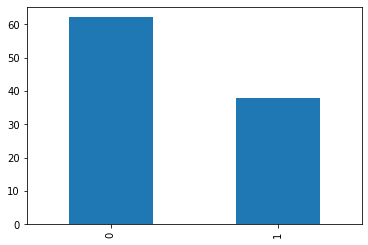

In [64]:
round(leads_data['Converted'].value_counts()*100/leads_data.shape[0],2).plot.bar()
plt.show()

#### 38.54% of leads got converted rest 61.46% did not.

    - The data does not look unbalanced.

#### TotalVisits

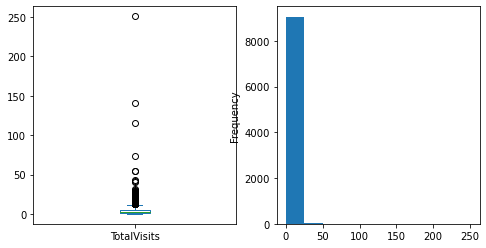

In [65]:
plt.figure(figsize=(8,4)) 
plt.subplot(1,2,1)
leads_data['TotalVisits'].plot.box()
plt.subplot(1,2,2)
leads_data['TotalVisits'].plot.hist()
plt.show()

In [66]:
leads_data['TotalVisits'].quantile(q= [0,0.25,0.50,0.75,0.90,0.95,0.99, 0.995, 0.999, 0.9995, 0.9999])

0.0000      0.0000
0.2500      1.0000
0.5000      3.0000
0.7500      5.0000
0.9000      7.0000
0.9500     10.0000
0.9900     17.0000
0.9950     21.0000
0.9990     31.8540
0.9995     54.4635
0.9999    151.1970
Name: TotalVisits, dtype: float64

In [67]:
p = leads_data['TotalVisits'].quantile(q=0.999)
p

31.854000000002998

In [68]:
leads_data[leads_data['TotalVisits'] >p].shape

(10, 25)

In [69]:
leads_data[leads_data['TotalVisits'] >p]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1160,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,Email Opened,Marketing Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2190,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,Page Visited on Website,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
2322,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,Page Visited on Website,Human Resource Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
5283,609249,Landing Page Submission,Direct Traffic,Yes,No,0,74.0,1209,12.33,Page Visited on Website,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Page Visited on Website
5530,607494,Landing Page Submission,Direct Traffic,Yes,No,0,41.0,311,1.14,Page Visited on Website,Retail Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Page Visited on Website
5538,607470,Landing Page Submission,Referral Sites,No,No,0,54.0,1280,4.50,SMS Sent,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent
5608,606961,Landing Page Submission,Referral Sites,Yes,No,0,115.0,187,8.21,Page Visited on Website,Rural and Agribusiness,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Page Visited on Website
6102,602958,Landing Page Submission,Direct Traffic,No,No,1,251.0,49,1.48,Page Visited on Website,Supply Chain Management,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
6580,599321,API,Google,No,No,0,32.0,26,1.78,Email Opened,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
8230,587083,Landing Page Submission,Direct Traffic,Yes,No,0,42.0,1148,3.82,Page Visited on Website,Not Mentioned,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


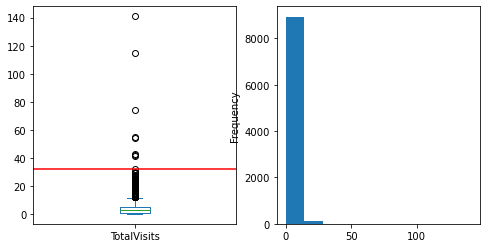

In [70]:
plt.figure(figsize=(8,4)) 
plt.subplot(1,2,1)
leads_data[leads_data['TotalVisits'] <250].TotalVisits.plot.box()
plt.axhline(p, color='r')
plt.subplot(1,2,2)
leads_data[leads_data['TotalVisits'] <250].TotalVisits.plot.hist()
plt.show()

In [71]:
# drop the record which have TotalVisits > 99.9 percentile

leads_data = leads_data[leads_data['TotalVisits'] <=p]
leads_data.shape

(9064, 25)

#### Total Time Spent on Website

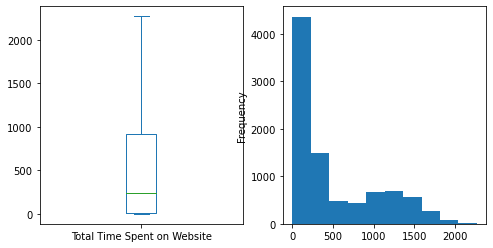

In [72]:
plt.figure(figsize=(8,4)) 
plt.subplot(1,2,1)
leads_data['Total Time Spent on Website'].plot.box()
plt.subplot(1,2,2)
leads_data['Total Time Spent on Website'].plot.hist()
plt.show()

Obs - Has no missing value or outliers. we are good with this field.

#### Page Views Per Visit 

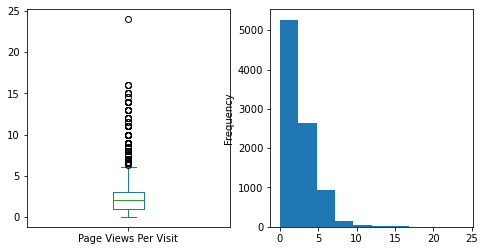

In [73]:
plt.figure(figsize=(8,4)) 
plt.subplot(1,2,1)
leads_data['Page Views Per Visit'].plot.box()
plt.subplot(1,2,2)
leads_data['Page Views Per Visit'].plot.hist()
plt.show()

'Page Views Per Visit' has outliers, hence we should drop those values.

### Binary Variables

In [74]:
binary_var = []
for i in leads_data.columns:
    if len(leads_data[i].unique())<=2:
        binary_var.append(i)
        
binary_var

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']

In [75]:
len(binary_var)

15

#### There are 15 variables which have only 2 outcomes., i.e., binary variables.

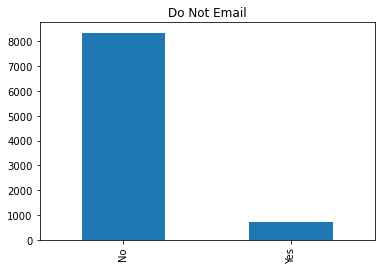

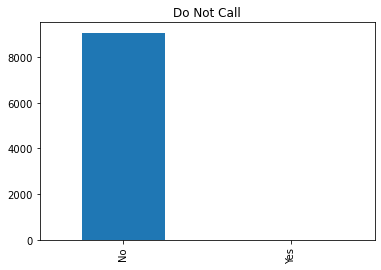

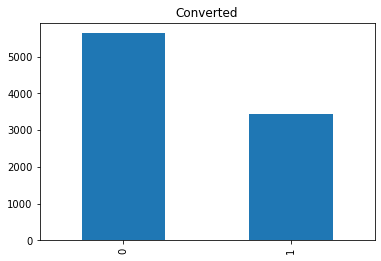

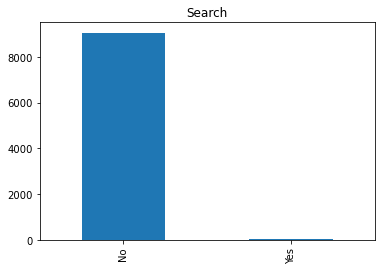

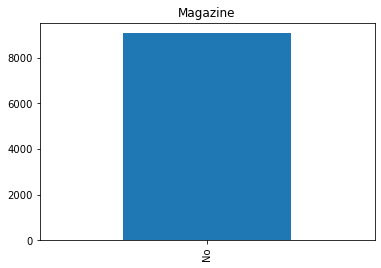

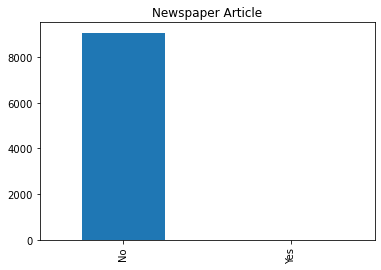

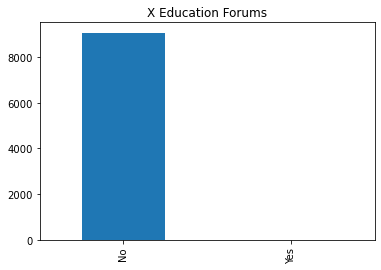

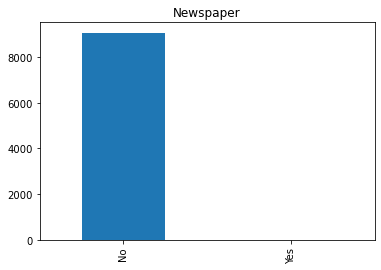

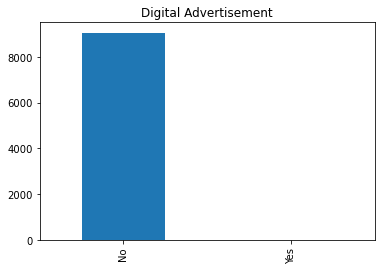

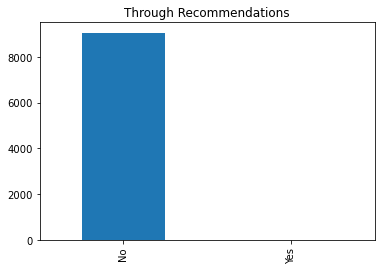

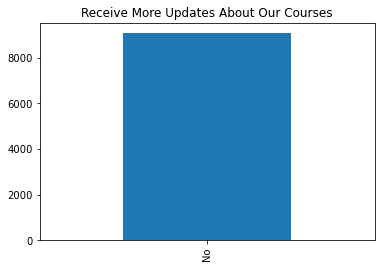

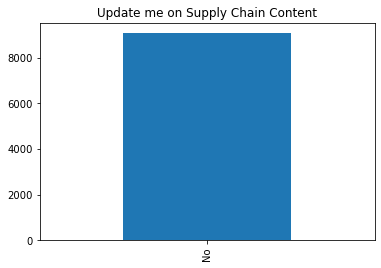

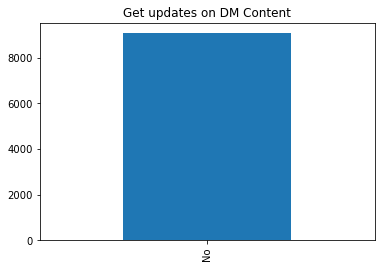

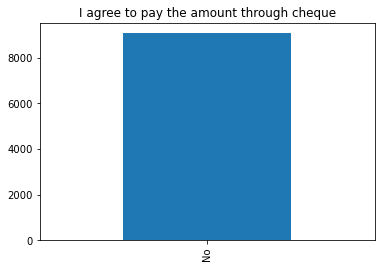

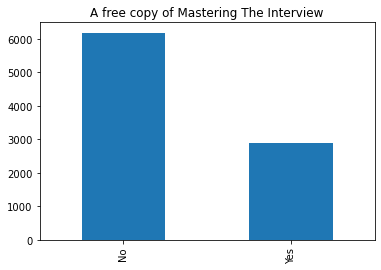

In [76]:
for i in binary_var:
    leads_data[i].value_counts().plot.bar()
    plt.title(i)
    plt.show()

##### Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content and I agree to pay the amount through cheque have only one outcome.

##### Its better to drop these variables

In [77]:
# droping Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content and I agree to pay the amount through cheque

leads_data = leads_data.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,No,No,No,No,No,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,No,No,No,No,No,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,No,No,No,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,No,No,No,No,No,No,No,Modified


In [78]:
leads_data.shape

(9064, 20)

In [79]:
# list of variables to map

varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

# Applying the function to the binary variable list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [80]:
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,0,0,0,0,0,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,0,0,0,0,0,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,0,0,0,0,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,0,0,0,0,0,0,0,Modified


#### Do Not Email

An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

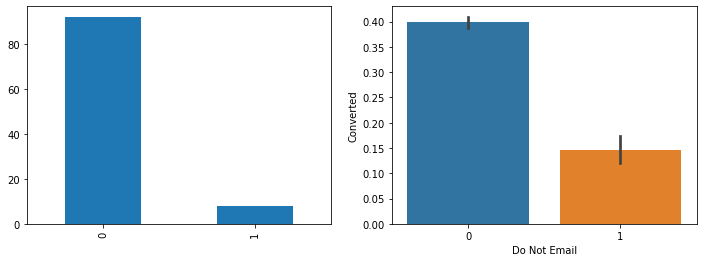

In [81]:
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
(leads_data['Do Not Email'].value_counts()*100/leads_data.shape[0]).plot.bar()
plt.subplot(1,2,2)
sns.barplot(x='Do Not Email',y='Converted',data=leads_data)
plt.show()

In [82]:
round(leads_data['Do Not Email'].value_counts()*100/leads_data.shape[0],2)

0    92.17
1     7.83
Name: Do Not Email, dtype: float64

##### Observation

    - 92% says do not email and only 8% has asked to get email.
    - 40% who said no to do not email got converted and 15% who said yes to do not email got converted. 
    - It seems this variable is not very useful for the analysis.

#### Do Not Call

An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

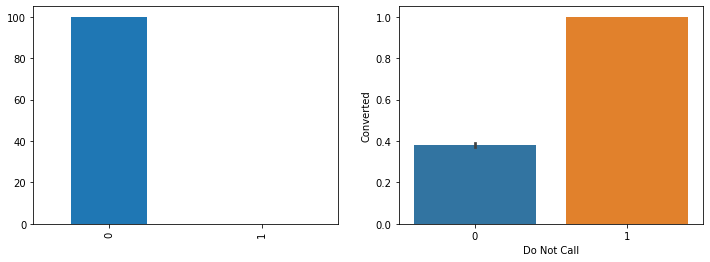

In [83]:
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
(leads_data['Do Not Call'].value_counts()*100/leads_data.shape[0]).plot.bar()
plt.subplot(1,2,2)
sns.barplot(x='Do Not Call',y='Converted',data=leads_data)
plt.show()

In [84]:
round(leads_data['Do Not Call'].value_counts()*100/leads_data.shape[0],2)

0    99.98
1     0.02
Name: Do Not Call, dtype: float64

In [85]:
leads_data[leads_data['Do Not Call'] == 1]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
619,654027,API,Google,0,1,1,9.0,1482,3.0,Email Opened,Marketing Management,Unemployed,0,0,0,0,0,0,0,Modified
4335,618248,Lead Add Form,Reference,0,1,1,0.0,0,0.0,Olark Chat Conversation,Healthcare Management,Unemployed,0,0,0,0,0,0,0,Modified


#### Observation

    - 99% says do not call and only 0.02% has asked to get calls.
    - The variable has no varaiability its better to drop the variable.

#### Dropping binary varables which have high percentage of one value (more than 95%). This is because these variables have no variablility and they will not contribute in model building.

In [86]:
# drop  'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations'

leads_data = leads_data.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations'], axis=1)
leads_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,0,Modified


In [87]:
binary_var = []
for i in leads_data.columns:
    if len(leads_data[i].unique())<=2:
        binary_var.append(i)
        
print(binary_var)
print(len(binary_var))

['Do Not Email', 'Converted', 'A free copy of Mastering The Interview']
3


In [88]:
leads_data.shape

(9064, 13)

### Categorical variables

In [89]:
categorical_var = leads_data.select_dtypes(include = 'object').columns

categorical_var = list(set(categorical_var).difference(set(binary_var)))

print(len(categorical_var))
print(categorical_var)

6
['Last Activity', 'What is your current occupation', 'Lead Origin', 'Lead Source', 'Specialization', 'Last Notable Activity']


#### Lead Origin

The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

In [90]:
leads_data['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=object)

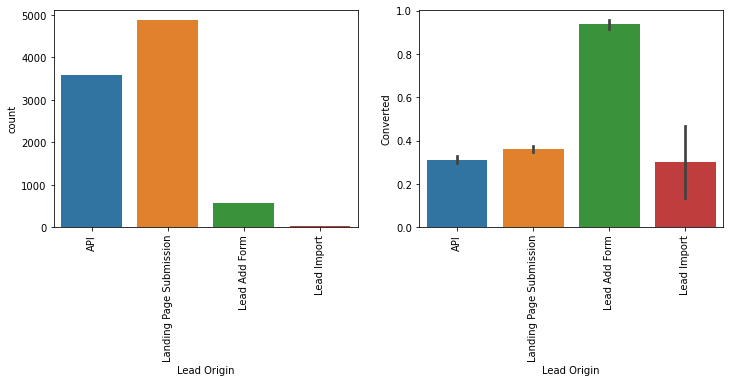

In [91]:
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
sns.countplot(leads_data['Lead Origin'])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='Lead Origin',y='Converted',data=leads_data)
plt.xticks(rotation=90)
plt.show()

##### Lead Origin type

    - API - API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other.
    
    - Landing page submission - redirected from some other site to this site and immediately submitted the form.

    - Lead add from - The leads fills a form.

    - Lead import - Got information of thi lead from other sources.

In [92]:
# create dummy variables for Lead Origin
lead_origin_df = pd.get_dummies(leads_data['Lead Origin'], prefix = 'Lead_origin', drop_first=True)

# concating lead origin dummy variables to leads_data
leads_data = pd.concat([leads_data, lead_origin_df], axis=1)

# drop Lead Origin column
leads_data.drop('Lead Origin', axis=1, inplace=True)

leads_data.head()

,Lead Number,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import
0,660737,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,0,Modified,0,0,0
1,660728,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,0,Email Opened,0,0,0
2,660727,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0
3,660719,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0
4,660681,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,0,Modified,1,0,0


#### Lead Source

The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

In [93]:
round(leads_data['Lead Source'].value_counts()*100/leads_data.shape[0],2)

Google               31.63
Direct Traffic       27.98
Olark Chat           19.34
Organic Search       12.73
Reference             4.89
Welingak Website      1.42
Referral Sites        1.36
Facebook              0.34
bing                  0.07
google                0.06
Click2call            0.04
Press_Release         0.02
Social Media          0.02
Live Chat             0.02
youtubechannel        0.01
testone               0.01
Pay per Click Ads     0.01
welearnblog_Home      0.01
WeLearn               0.01
blog                  0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

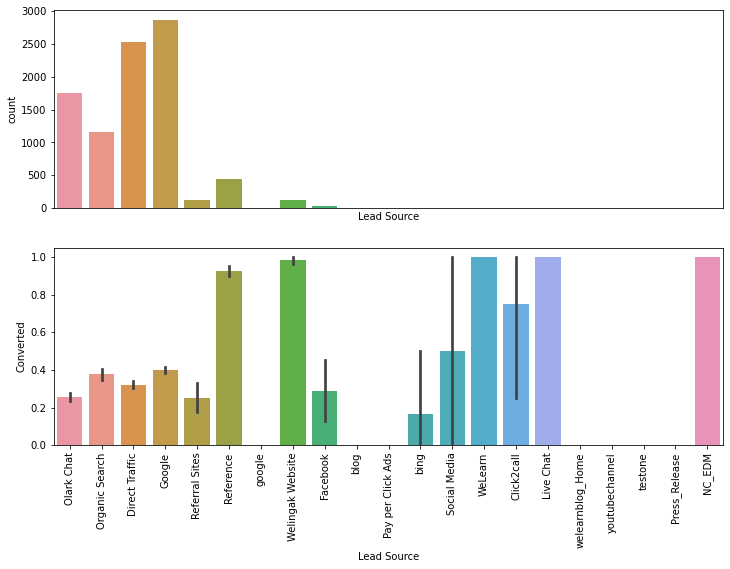

In [94]:
plt.figure(figsize=(12,8)) 
plt.subplot(2,1,1)
sns.countplot(leads_data['Lead Source'])
plt.xticks([])
plt.subplot(2,1,2)
sns.barplot(x='Lead Source',y='Converted',data=leads_data)
plt.xticks(rotation=90)
plt.show()

In [95]:
len(leads_data['Lead Source'].unique())

21

##### Observations

    - There are 22 categories, we can club the categories with frequency < 0.1% together and then create their dummy variables.

In [96]:
leads_data.loc[leads_data["Lead Source"] == "google", 'Lead Source'] ='Google'

In [97]:
round(leads_data['Lead Source'].value_counts()*100/leads_data.shape[0],2)

Google               31.69
Direct Traffic       27.98
Olark Chat           19.34
Organic Search       12.73
Reference             4.89
Welingak Website      1.42
Referral Sites        1.36
Facebook              0.34
bing                  0.07
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

In [98]:
leads_data.loc[leads_data['Lead Source'].isin(['Facebook', 'bing', 'Click2call', 'Social Media', 'Live Chat', 'Press_Release', 'WeLearn', 'Pay per Click Ads', 'youtubechannel', 'NC_EDM', 'testone', 'blog', 'welearnblog_Home']), 'Lead Source'] = 'Others'

In [99]:
round(leads_data['Lead Source'].value_counts()*100/leads_data.shape[0],2)

Google              31.69
Direct Traffic      27.98
Olark Chat          19.34
Organic Search      12.73
Reference            4.89
Welingak Website     1.42
Referral Sites       1.36
Others               0.60
Name: Lead Source, dtype: float64

In [100]:
# create dummy variables for Lead Origin
lead_source_df = pd.get_dummies(leads_data['Lead Source'], prefix = 'Lead_source', drop_first=True)

# concating lead origin dummy variables to leads_data
leads_data = pd.concat([leads_data, lead_source_df], axis=1)

# drop Lead Source column
leads_data.drop('Lead Source', axis=1, inplace=True)

leads_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website
0,660737,0,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0
1,660728,0,0,5.0,674,2.5,Email Opened,Not Mentioned,Unemployed,0,Email Opened,0,0,0,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0
4,660681,0,1,2.0,1428,1.0,Converted to Lead,Not Mentioned,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0


#### Last Activity

Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

In [101]:
round(leads_data['Last Activity'].value_counts()*100/leads_data.shape[0],2)

Email Opened                    37.84
SMS Sent                        29.95
Olark Chat Conversation         10.72
Page Visited on Website          6.98
Converted to Lead                4.72
Email Bounced                    3.44
Email Link Clicked               2.95
Form Submitted on Website        1.28
Unreachable                      0.99
Unsubscribed                     0.65
Had a Phone Conversation         0.28
View in browser link Clicked     0.07
Approached upfront               0.06
Email Received                   0.02
Email Marked Spam                0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [102]:
len(leads_data['Last Activity'].unique())

17

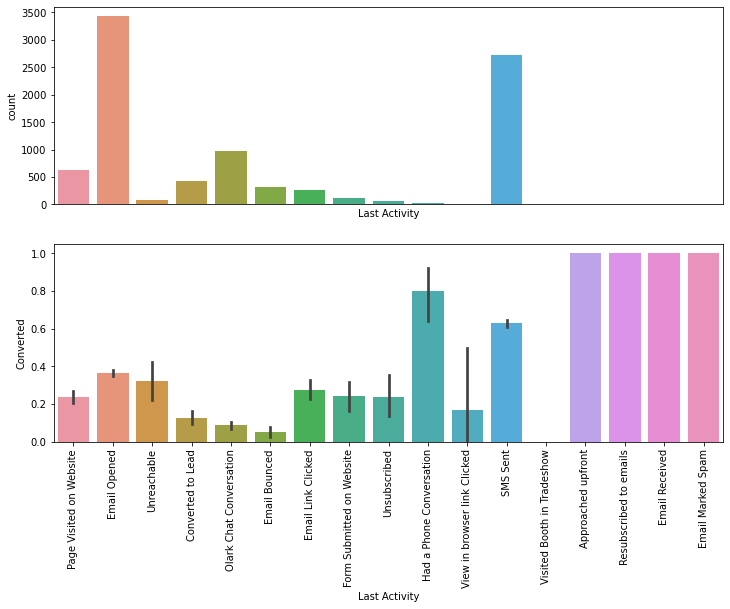

In [103]:
plt.figure(figsize=(12,8)) 
plt.subplot(2,1,1)
sns.countplot(leads_data['Last Activity'])
plt.xticks([])
plt.subplot(2,1,2)
sns.barplot(x='Last Activity',y='Converted',data=leads_data)
plt.xticks(rotation=90)
plt.show()

##### Observations

- There are 18 categories, we can club the categories with frequency < 4% together and then create their dummy variables.

In [104]:
leads_data.loc[leads_data["Last Activity"].isin(['Unreachable', 'Email Bounced',
 'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
 'Had a Phone Conversation', 'View in browser link Clicked',
 'Visited Booth in Tradeshow', 'Approached upfront',
 'Resubscribed to emails', 'Email Received', 'Email Marked Spam']), 'Last Activity'] ='Others'

In [105]:
round(leads_data['Last Activity'].value_counts()*100/leads_data.shape[0],2)

Email Opened               37.84
SMS Sent                   29.95
Olark Chat Conversation    10.72
Others                      9.77
Page Visited on Website     6.98
Converted to Lead           4.72
Name: Last Activity, dtype: float64

In [106]:
# create dummy variables for Last Activity
last_activity_df = pd.get_dummies(leads_data['Last Activity'], prefix = 'Last_Activity', drop_first=True)

# concating lead origin dummy variables to leads_data
leads_data = pd.concat([leads_data, last_activity_df], axis=1)

# drop Lead Source column
leads_data.drop('Last Activity', axis=1, inplace=True)

leads_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,Not Mentioned,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,Not Mentioned,Unemployed,0,Email Opened,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Business Administration,Student,1,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,660681,0,1,2.0,1428,1.0,Not Mentioned,Unemployed,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


#### Last Notable Activity

In [107]:
round(leads_data['Last Notable Activity'].value_counts()*100/leads_data.shape[0],2)

Modified                        36.02
Email Opened                    31.12
SMS Sent                        23.73
Page Visited on Website          3.45
Olark Chat Conversation          2.02
Email Link Clicked               1.91
Email Bounced                    0.66
Unsubscribed                     0.50
Unreachable                      0.35
Had a Phone Conversation         0.15
Email Marked Spam                0.02
Approached upfront               0.01
Resubscribed to emails           0.01
View in browser link Clicked     0.01
Form Submitted on Website        0.01
Email Received                   0.01
Name: Last Notable Activity, dtype: float64

In [108]:
len(leads_data['Last Notable Activity'].unique())

16

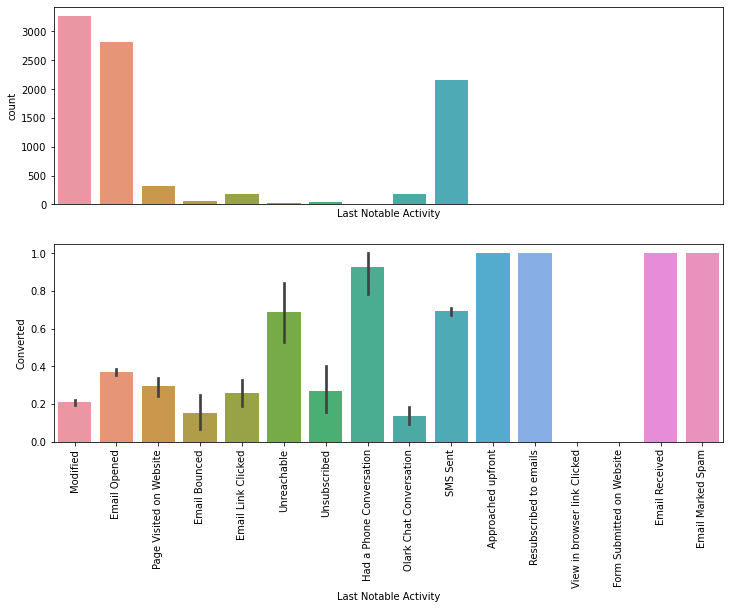

In [109]:
plt.figure(figsize=(12,8)) 
plt.subplot(2,1,1)
sns.countplot(leads_data['Last Notable Activity'])
plt.xticks([])
plt.subplot(2,1,2)
sns.barplot(x='Last Notable Activity',y='Converted',data=leads_data)
plt.xticks(rotation=90)
plt.show()

##### Observations

- There are 10 categories, we can club the categories with frequency < 3% together and then create their dummy variables.

In [110]:
leads_data["Last Notable Activity"].unique()

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [111]:
leads_data.loc[leads_data["Last Notable Activity"].isin(['Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation','Olark Chat Conversation', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam']), 'Last Notable Activity'] ='Others'

In [112]:
round(leads_data['Last Notable Activity'].value_counts()*100/leads_data.shape[0],2)

Modified                   36.02
Email Opened               31.12
SMS Sent                   23.73
Others                      5.67
Page Visited on Website     3.45
Name: Last Notable Activity, dtype: float64

In [113]:
# create dummy variables for Last Notable Activity
last_notable_activity_df = pd.get_dummies(leads_data['Last Notable Activity'], prefix = 'Last_Notable_Activity', drop_first=True)

# concating lead origin dummy variables to leads_data
leads_data = pd.concat([leads_data, last_notable_activity_df], axis=1)

# drop Lead Source column
leads_data.drop('Last Notable Activity', axis=1, inplace=True)

leads_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,Not Mentioned,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,Not Mentioned,Unemployed,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,0,1,2.0,1532,2.0,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,Not Mentioned,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Specialization

The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.

In [114]:
round(leads_data['Specialization'].value_counts()*100/leads_data.shape[0],2)

Not Mentioned                        36.17
Finance Management                   10.58
Human Resource Management             9.22
Marketing Management                  9.07
Operations Management                 5.51
Business Administration               4.40
IT Projects Management                4.03
Supply Chain Management               3.81
Banking, Investment And Insurance     3.70
Travel and Tourism                    2.23
Media and Advertising                 2.23
International Business                1.94
Healthcare Management                 1.72
E-COMMERCE                            1.22
Hospitality Management                1.22
Retail Management                     1.09
Rural and Agribusiness                0.79
E-Business                            0.63
Services Excellence                   0.44
Name: Specialization, dtype: float64

In [115]:
len(leads_data['Specialization'].unique())

19

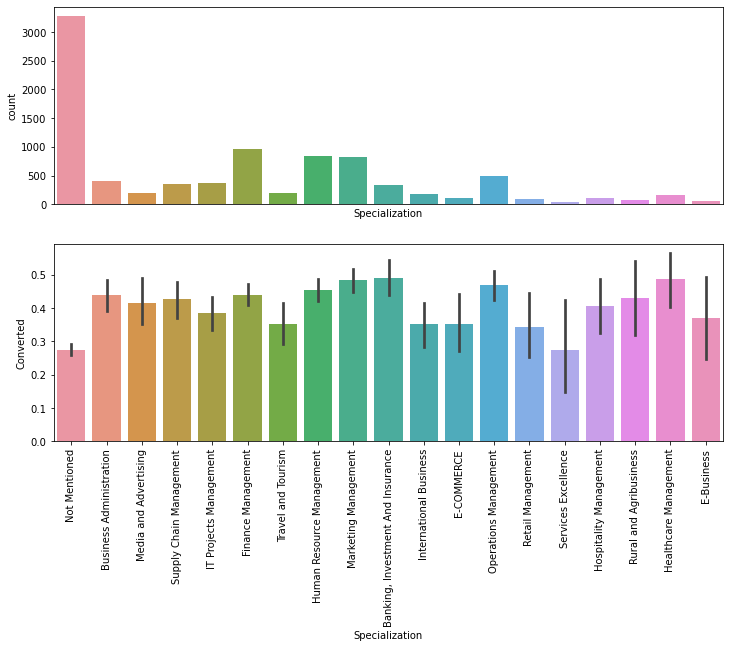

In [116]:
plt.figure(figsize=(12,8)) 
plt.subplot(2,1,1)
sns.countplot(leads_data['Specialization'])
plt.xticks([])
plt.subplot(2,1,2)
sns.barplot(x='Specialization',y='Converted',data=leads_data)
plt.xticks(rotation=90)
plt.show()

In [117]:
leads_data['Specialization'].unique()

array(['Not Mentioned', 'Business Administration',
       'Media and Advertising', 'Supply Chain Management',
       'IT Projects Management', 'Finance Management',
       'Travel and Tourism', 'Human Resource Management',
       'Marketing Management', 'Banking, Investment And Insurance',
       'International Business', 'E-COMMERCE', 'Operations Management',
       'Retail Management', 'Services Excellence',
       'Hospitality Management', 'Rural and Agribusiness',
       'Healthcare Management', 'E-Business'], dtype=object)

In [118]:
leads_data.loc[leads_data["Specialization"].isin(['Not Mentioned', 'Media and Advertising', 'Supply Chain Management',
       'Travel and Tourism', 'Banking, Investment And Insurance','International Business', 'E-COMMERCE', 
       'Retail Management', 'Services Excellence','Hospitality Management', 'Rural and Agribusiness',
       'Healthcare Management', 'E-Business']), 'Specialization'] ='Others'

In [119]:
round(leads_data['Specialization'].value_counts()*100/leads_data.shape[0],2)

Others                       57.19
Finance Management           10.58
Human Resource Management     9.22
Marketing Management          9.07
Operations Management         5.51
Business Administration       4.40
IT Projects Management        4.03
Name: Specialization, dtype: float64

In [120]:
# create dummy variables for Last Notable Activity
specialization_df = pd.get_dummies(leads_data['Specialization'], prefix = 'Specialization', drop_first=True)

# concating lead origin dummy variables to leads_data
leads_data = pd.concat([leads_data, specialization_df], axis=1)

# drop Lead Source column
leads_data.drop('Specialization', axis=1, inplace=True)

leads_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others
0,660737,0,0,0.0,0,0.0,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,660728,0,0,5.0,674,2.5,Unemployed,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,660727,0,1,2.0,1532,2.0,Student,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,1.0,305,1.0,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
4,660681,0,1,2.0,1428,1.0,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


#### What is your current occupation

In [121]:
round(leads_data['What is your current occupation'].value_counts()*100/leads_data.shape[0],2)

Unemployed              89.91
Working Professional     7.47
Student                  2.27
Other                    0.17
Housewife                0.10
Businessman              0.09
Name: What is your current occupation, dtype: float64

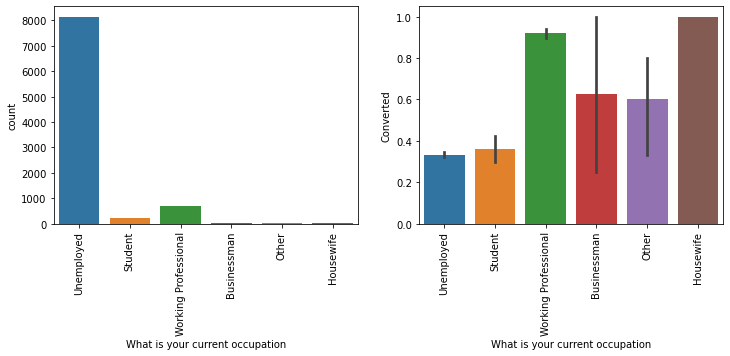

In [122]:
plt.figure(figsize=(12,4)) 
plt.subplot(1,2,1)
sns.countplot(leads_data['What is your current occupation'])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='What is your current occupation',y='Converted',data=leads_data)
plt.xticks(rotation=90)
plt.show()

In [123]:
len(leads_data['What is your current occupation'].unique())

6

In [124]:
# create dummy variables for Lead Origin
lead_occupation_df = pd.get_dummies(leads_data['What is your current occupation'], prefix = 'Lead_occupation', drop_first=True)

# concating lead origin dummy variables to leads_data
leads_data = pd.concat([leads_data, lead_occupation_df], axis=1)

# drop Lead Source column
leads_data.drop('What is your current occupation', axis=1, inplace=True)

leads_data.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Lead_occupation_Housewife,Lead_occupation_Other,Lead_occupation_Student,Lead_occupation_Unemployed,Lead_occupation_Working Professional
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [125]:
# assigning lead numbers as index

leads_data = leads_data.set_index(['Lead Number'])
leads_data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Others,Lead_source_Reference,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_Page Visited on Website,Last_Notable_Activity_SMS Sent,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Lead_occupation_Housewife,Lead_occupation_Other,Lead_occupation_Student,Lead_occupation_Unemployed,Lead_occupation_Working Professional
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
660728,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
660681,0,1,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [126]:
leads_data.shape

(9064, 36)

In [127]:
Lead_conversion_rate = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
round(Lead_conversion_rate, 2)

37.89

### Multivariate Analysis

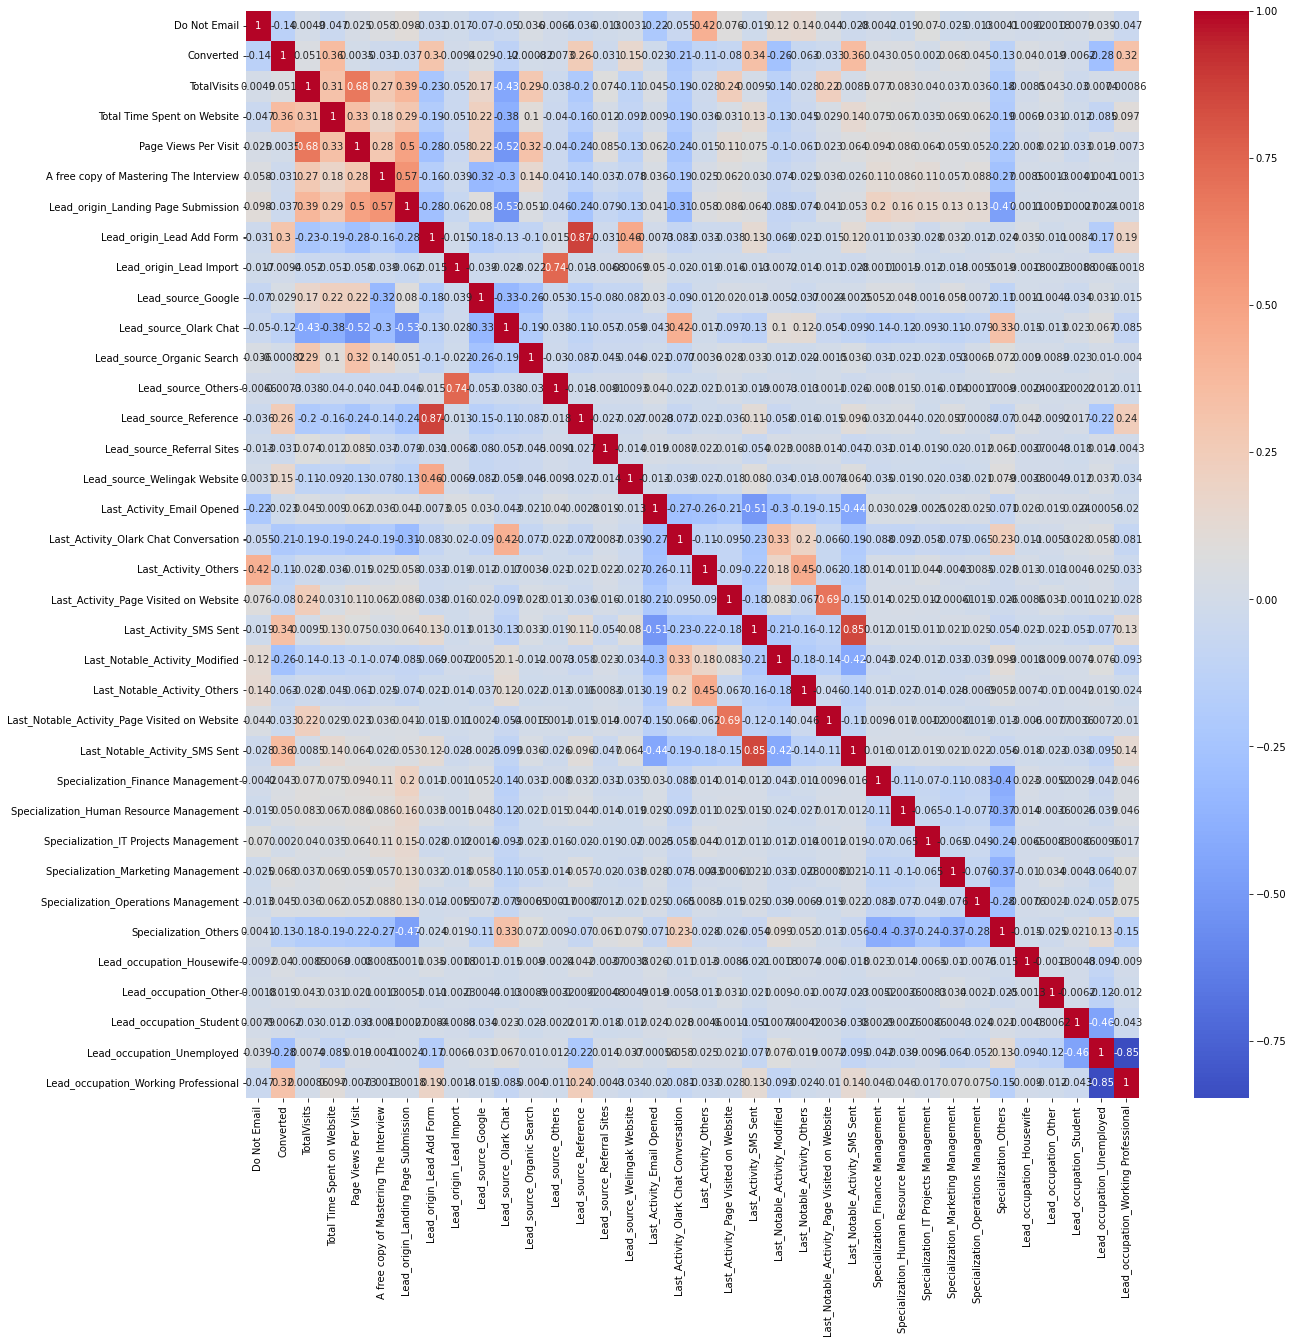

In [128]:
# correlation and heatmap
plt.figure(figsize = (20,20)) 
sns.heatmap(leads_data.corr(), annot = True, cmap="coolwarm")
plt.show()

In [129]:
# Dropping highly correlated variables

leads_data = leads_data.drop(['Lead_source_Reference', 'Lead_source_Others', 'Page Views Per Visit', 'Last_Notable_Activity_Page Visited on Website',
       'Last_Notable_Activity_SMS Sent', 'Lead_occupation_Working Professional'], 1)

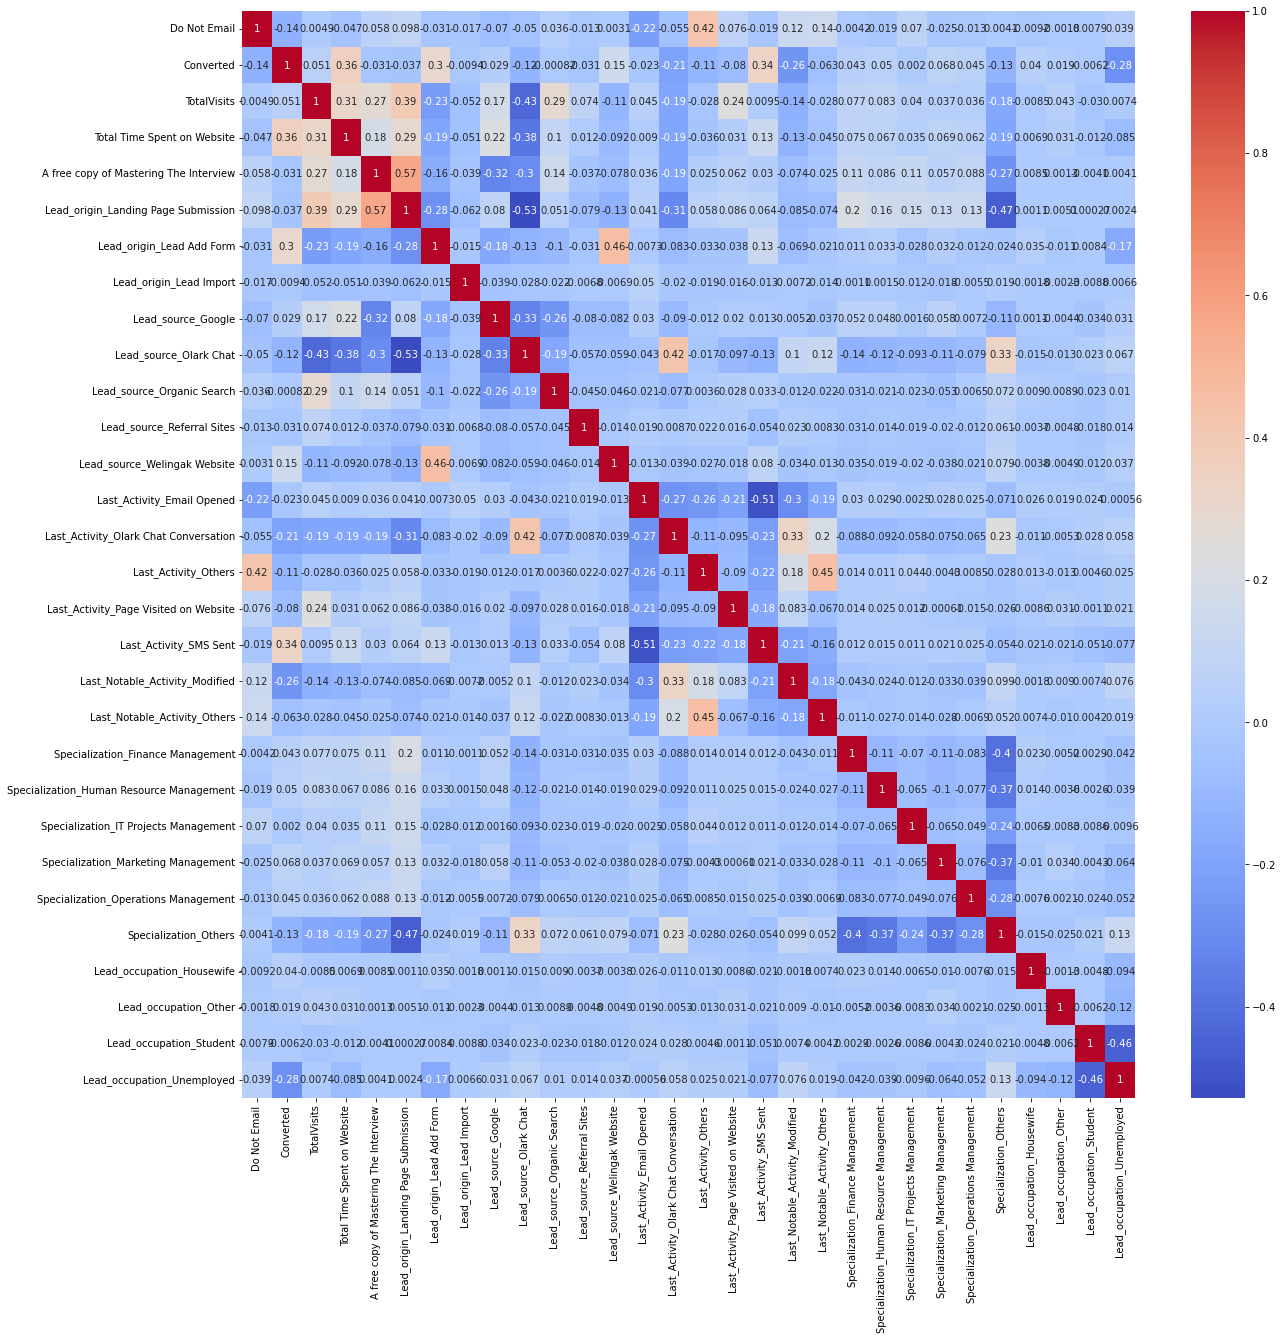

In [130]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20)) 
sns.heatmap(leads_data.corr(), annot = True, cmap="coolwarm")
plt.show()

#### Observation

The top three highly correlated variables with converted are:
- Total Time Spend on Website
- Lead Origin - Lead Add form
- Last Activity - SMS Sent

### Data Preprocessing

In [131]:
# train test split
from sklearn.model_selection import train_test_split

train, test = train_test_split(leads_data, train_size = 0.7, test_size =0.3, random_state=100)
print(train.shape)
print(test.shape)

y_train = train.pop('Converted')
X_train = train

y_test = test.pop('Converted')
X_test = test

(6344, 30)
(2720, 30)


In [132]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to all columns except binary variables.
num_vars = ['TotalVisits', 'Total Time Spent on Website']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Lead_occupation_Housewife,Lead_occupation_Other,Lead_occupation_Student,Lead_occupation_Unemployed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
638858,0,0.166667,0.051937,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
626930,0,0.100000,0.186620,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
611456,0,0.333333,0.574824,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
627212,0,0.066667,0.290493,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
592608,1,0.900000,0.093310,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


## Model Building

#### Building a logistic model with all the variables

In [133]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2665.1
Date:                Mon, 17 Oct 2022   Deviance:                       5330.3
Time:                        16:04:00   Pearson chi2:                 6.60e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1700      0.341      0.498      0.618      -0.499       0.839
Do Not Email                                -1.2657      0.181     -7.009      0.000      -1.620      -0.912
TotalVisits                                  1.9522      0.376      5.188      0.000       1.215       2.690
Total Time Spent on Website                  4.5514      0.168     27.025      0.000       4.221       4.882
A free copy of Mastering The Interview      -0.0772      0.104     -0.740      0.460      -0.282       0.127
Lead_origin_Landing Page Submission         -0.4085      0.111     -3.687      0.000      -0.626      -0.191
Lead_origin_Lead Add Form                    3.9262      0.259     15.158      0.000       3.419       4.434
Lead_origin_Lead Import                      1.4743      0.476      3.098      0.002       0.542       2.407
Lead_source_Google                           0.2487      0.111      2.233      0.026       0.030       0.467
Lead_source_Olark Chat                       1.3600      0.157      8.662      0.000       1.052       1.668
Lead_source_Organic Search                   0.1031      0.126      0.817      0.414      -0.144       0.350
Lead_source_Referral Sites                  -0.1880      0.351     -0.535      0.593      -0.877       0.501
Lead_source_Welingak Website                 1.9066      0.753      2.533      0.011       0.431       3.382
Last_Activity_Email Opened                   0.4238      0.222      1.909      0.056      -0.011       0.859
Last_Activity_Olark Chat Conversation       -0.6326      0.259     -2.442      0.015      -1.140      -0.125
Last_Activity_Others                         0.4620      0.257      1.795      0.073      -0.043       0.967
Last_Activity_Page Visited on Website       -0.1023      0.257     -0.398      0.691      -0.607       0.402
Last_Activity_SMS Sent                       1.6284      0.221      7.362      0.000       1.195       2.062
Last_Notable_Activity_Modified              -0.7601      0.098     -7.795      0.000      -0.951      -0.569
Last_Notable_Activity_Others                -0.1238      0.221     -0.559      0.576      -0.558       0.310
Specialization_Finance Management            0.0667      0.192      0.347      0.729      -0.310       0.444
Specialization_Human Resource Management     0.0275      0.197      0.140      0.889      -0.359       0.414
Specialization_IT Projects Management        0.0972      0.238      0.408      0.683      -0.370       0.564
Specialization_Marketing Management          0.2046      0.198      1.032      0.302      -0.184       0.593
Specialization_Operations Management         0.0465      0.219      0.213      0.832      -0.382       0.475
Specialization_Others          

In [134]:
# Feature Selection Using RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [199]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

rfe.support_

array([ True,  True,  True, False, False,  True,  True, False,  True,
       False, False,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True,  True])

In [136]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 10),
 ('Lead_origin_Landing Page Submission', False, 3),
 ('Lead_origin_Lead Add Form', True, 1),
 ('Lead_origin_Lead Import', True, 1),
 ('Lead_source_Google', False, 5),
 ('Lead_source_Olark Chat', True, 1),
 ('Lead_source_Organic Search', False, 11),
 ('Lead_source_Referral Sites', False, 6),
 ('Lead_source_Welingak Website', True, 1),
 ('Last_Activity_Email Opened', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Others', False, 2),
 ('Last_Activity_Page Visited on Website', False, 8),
 ('Last_Activity_SMS Sent', True, 1),
 ('Last_Notable_Activity_Modified', True, 1),
 ('Last_Notable_Activity_Others', False, 9),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Human Resource Management', False, 15),
 ('Specialization_IT Projects Management', False, 12),
 ('Specialization_Marketing Man

In [137]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_origin_Lead Add Form', 'Lead_origin_Lead Import',
       'Lead_source_Olark Chat', 'Lead_source_Welingak Website',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Last_Notable_Activity_Modified',
       'Lead_occupation_Housewife', 'Lead_occupation_Other',
       'Lead_occupation_Student', 'Lead_occupation_Unemployed'],
      dtype='object')

In [138]:
X_train.columns[~rfe.support_] # removing these variables

Index(['A free copy of Mastering The Interview',
       'Lead_origin_Landing Page Submission', 'Lead_source_Google',
       'Lead_source_Organic Search', 'Lead_source_Referral Sites',
       'Last_Activity_Others', 'Last_Activity_Page Visited on Website',
       'Last_Notable_Activity_Others', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others'],
      dtype='object')

In [139]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.3
Date:                Mon, 17 Oct 2022   Deviance:                       5390.7
Time:                        16:04:03   Pearson chi2:                 6.62e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0445      0.210      0.212      0.832      -0.367       0.456
Do Not Email                             -1.2732      0.175     -7.264      0.000      -1.617      -0.930
TotalVisits                               1.7101      0.346      4.949      0.000       1.033       2.387
Total Time Spent on Website               4.5645      0.167     27.389      0.000       4.238       4.891
Lead_origin_Lead Add Form                 4.0989      0.233     17.618      0.000       3.643       4.555
Lead_origin_Lead Import                   1.5470      0.458      3.378      0.001       0.649       2.445
Lead_source_Olark Chat                    1.3862      0.113     12.307      0.000       1.165       1.607
Lead_source_Welingak Website              1.7374      0.752      2.311      0.021       0.264       3.211
Last_Activity_Email Opened                0.2982      0.107      2.781      0.005       0.088       0.508
Last_Activity_Olark Chat Conversation    -0.7600      0.177     -4.291      0.000      -1.107      -0.413
Last_Activity_SMS Sent                    1.4783      0.108     13.692      0.000       1.267       1.690
Last_Notable_Activity_Modified           -0.7414      0.085     -8.706      0.000      -0.908      -0.575
Lead_occupation_Housewife                20.4066   1.54e+04      0.001      0.999   -3.02e+04    3.02e+04
Lead_occupation_Other                    -2.0192      0.745     -2.710      0.007      -3.480      -0.559
Lead_occupation_Student                  -2.3256      0.278     -8.379      0.000      -2.870      -1.782
Lead_occupation_Unemployed               -2.7149      0.181    -15.017      0.000      -3.069      -2.361
=========================================================================================================
"""

##### Lead_occupation_Housewife has very high p-value.

In [140]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
638858    0.135854
626930    0.205969
611456    0.627945
627212    0.157932
592608    0.121464
655916    0.144634
608807    0.367191
590108    0.017929
586987    0.938593
646189    0.714460
dtype: float64

In [141]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13585422, 0.20596863, 0.62794521, 0.15793211, 0.1214644 ,
       0.14463387, 0.3671914 , 0.01792911, 0.93859288, 0.71445987])

In [142]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.135854,638858
1,0,0.205969,626930
2,0,0.627945,611456
3,0,0.157932,627212
4,1,0.121464,592608


In [143]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.135854,638858,0
1,0,0.205969,626930,0
2,0,0.627945,611456,1
3,0,0.157932,627212,0
4,1,0.121464,592608,0


#### Confusion matrix

In [144]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3534  418]
 [ 751 1641]]


In [145]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2))

0.82


#### # Checking VIFs

In [146]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Lead_occupation_Unemployed,6.60
7,Last_Activity_Email Opened,2.90
1,TotalVisits,2.51
9,Last_Activity_SMS Sent,2.32
2,Total Time Spent on Website,2.13
5,Lead_source_Olark Chat,1.98
10,Last_Notable_Activity_Modified,1.97
8,Last_Activity_Olark Chat Conversation,1.80
3,Lead_origin_Lead Add Form,1.51
6,Lead_source_Welingak Website,1.33


##### Lead_occupation_Unemployed has VIF > 5.

- On camparing Lead_occupation_Unemployed and Lead_occupation_Housewife, lets drop Lead_occupation_Housewife as it has high p-value. The Lead_occupation_Unemployed is not that high it might reduce after dropping Lead_occupation_Housewife.

In [147]:
col = col.drop('Lead_occupation_Housewife', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead_origin_Lead Add Form', 'Lead_origin_Lead Import',
       'Lead_source_Olark Chat', 'Lead_source_Welingak Website',
       'Last_Activity_Email Opened', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_SMS Sent', 'Last_Notable_Activity_Modified',
       'Lead_occupation_Other', 'Lead_occupation_Student',
       'Lead_occupation_Unemployed'],
      dtype='object')

In [148]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2696.3
Date:                Mon, 17 Oct 2022   Deviance:                       5392.5
Time:                        16:04:03   Pearson chi2:                 6.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0706      0.209      0.337      0.736      -0.340       0.481
Do Not Email                             -1.2745      0.175     -7.269      0.000      -1.618      -0.931
TotalVisits                               1.7059      0.346      4.937      0.000       1.029       2.383
Total Time Spent on Website               4.5631      0.167     27.386      0.000       4.237       4.890
Lead_origin_Lead Add Form                 4.0988      0.233     17.622      0.000       3.643       4.555
Lead_origin_Lead Import                   1.5445      0.458      3.371      0.001       0.646       2.443
Lead_source_Olark Chat                    1.3846      0.113     12.295      0.000       1.164       1.605
Lead_source_Welingak Website              1.7366      0.752      2.310      0.021       0.263       3.210
Last_Activity_Email Opened                0.2981      0.107      2.780      0.005       0.088       0.508
Last_Activity_Olark Chat Conversation    -0.7612      0.177     -4.297      0.000      -1.108      -0.414
Last_Activity_SMS Sent                    1.4772      0.108     13.683      0.000       1.266       1.689
Last_Notable_Activity_Modified           -0.7415      0.085     -8.706      0.000      -0.908      -0.575
Lead_occupation_Other                    -2.0432      0.745     -2.743      0.006      -3.503      -0.583
Lead_occupation_Student                  -2.3502      0.277     -8.475      0.000      -2.894      -1.807
Lead_occupation_Unemployed               -2.7393      0.180    -15.181      0.000      -3.093      -2.386
=========================================================================================================
"""

##### All the variables are significant.

In [149]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Lead Number
638858    0.135961
626930    0.206131
611456    0.627844
627212    0.158060
592608    0.121101
655916    0.144773
608807    0.367308
590108    0.017931
586987    0.940024
646189    0.714324
dtype: float64

In [150]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.13596074, 0.20613121, 0.62784381, 0.15805982, 0.12110058,
       0.14477333, 0.36730789, 0.01793106, 0.94002401, 0.71432377])

In [151]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.135961,638858
1,0,0.206131,626930
2,0,0.627844,611456
3,0,0.158060,627212
4,1,0.121101,592608


In [152]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [153]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.135961,638858,0
1,0,0.206131,626930,0
2,0,0.627844,611456,1
3,0,0.158060,627212,0
4,1,0.121101,592608,0


In [154]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3534  418]
 [ 751 1641]]


In [155]:
# Let's check the overall accuracy.
print(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted),2))

0.82


In [156]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead_occupation_Unemployed,6.58
7,Last_Activity_Email Opened,2.89
1,TotalVisits,2.51
9,Last_Activity_SMS Sent,2.32
2,Total Time Spent on Website,2.13
5,Lead_source_Olark Chat,1.98
10,Last_Notable_Activity_Modified,1.97
8,Last_Activity_Olark Chat Conversation,1.80
3,Lead_origin_Lead Add Form,1.51
6,Lead_source_Welingak Website,1.32


#### Lead_occupation_Unemployed	

Though VIF is greater than 5, it is not that high. We can keep it for our model-building.

In [157]:
# Metrics beyond simply accuracy

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ',round(TP / float(TP+FN),4))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),4))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print ('Positive Predictive Value: ',round(TP / float(TP+FP),4))

# Negative predictive value
print ('Negative Predictive Value: ',round(TN / float(TN+ FN),4))

Sensitivity:  0.686
Specificity:  0.8942
False Positive Rate:  0.1058
Positive Predictive Value:  0.797
Negative Predictive Value:  0.8247


#### Plotting the ROC Curve

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

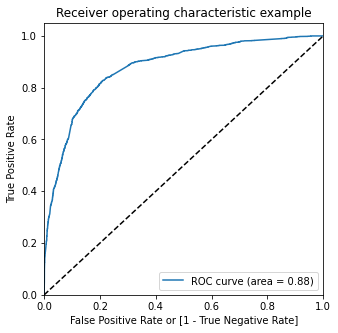

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [161]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.135961,638858,0,1,1,0,0,0,0,0,0,0,0
1,0,0.206131,626930,0,1,1,1,0,0,0,0,0,0,0
2,0,0.627844,611456,1,1,1,1,1,1,1,1,0,0,0
3,0,0.158060,627212,0,1,1,0,0,0,0,0,0,0,0
4,1,0.121101,592608,0,1,1,0,0,0,0,0,0,0,0


In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377049  1.000000  0.000000
0.1   0.1  0.576923  0.967391  0.340587
0.2   0.2  0.728720  0.909281  0.619433
0.3   0.3  0.800126  0.836957  0.777834
0.4   0.4  0.813682  0.753763  0.849949
0.5   0.5  0.815731  0.686037  0.894231
0.6   0.6  0.791141  0.569398  0.925354
0.7   0.7  0.774433  0.492475  0.945091
0.8   0.8  0.750788  0.391722  0.968117
0.9   0.9  0.705076  0.234950  0.989626


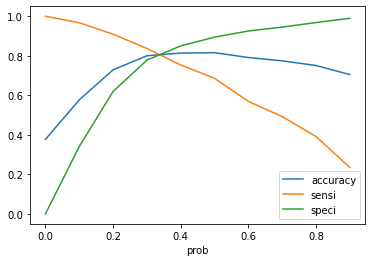

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

##### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.¶

In [164]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.135961,638858,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.206131,626930,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.627844,611456,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.158060,627212,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.121101,592608,0,1,1,0,0,0,0,0,0,0,0,0


In [165]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8084804539722572

In [166]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3221,  731],
       [ 484, 1908]], dtype=int64)

In [167]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ',round(TP / float(TP+FN),4))

# Let us calculate specificity
print('Specificity: ',round(TN / float(TN+FP),4))

# Calculate false postive rate - predicting churn when customer does not have churned
print('False Positive Rate: ',round(FP/ float(TN+FP),4))

# positive predictive value 
print ('Positive Predictive Value: ',round(TP / float(TP+FP),4))

# Negative predictive value
print ('Negative Predictive Value: ',round(TN / float(TN+ FN),4))

Sensitivity:  0.686
Specificity:  0.8942
False Positive Rate:  0.1058
Positive Predictive Value:  0.797
Negative Predictive Value:  0.8247


#### Precision and Recall

In [168]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3534,  418],
       [ 751, 1641]], dtype=int64)

Precision : TP / TP + FP

In [169]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7969888295288975

Recall : TP / TP + FN

In [170]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6860367892976589

In [171]:
from sklearn.metrics import precision_score, recall_score

In [172]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7969888295288975

In [173]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6860367892976589

### Making predictions on the test set

In [174]:
X_test.shape

(2720, 29)

In [175]:
# scale X_test

# Apply scaler to all columns except binary variables.
num_vars = ['TotalVisits', 'Total Time Spent on Website']

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [176]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead_origin_Landing Page Submission,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Google,Lead_source_Olark Chat,Lead_source_Organic Search,Lead_source_Referral Sites,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Lead_occupation_Housewife,Lead_occupation_Other,Lead_occupation_Student,Lead_occupation_Unemployed
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
610684,0,0.166667,0.016725,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
653473,0,0.266667,0.430458,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
620677,0,0.100000,0.611796,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1
652801,0,0.000000,0.000000,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
609659,0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [177]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead_origin_Lead Add Form,Lead_origin_Lead Import,Lead_source_Olark Chat,Lead_source_Welingak Website,Last_Activity_Email Opened,Last_Activity_Olark Chat Conversation,Last_Activity_SMS Sent,Last_Notable_Activity_Modified,Lead_occupation_Other,Lead_occupation_Student,Lead_occupation_Unemployed
Lead Number,,,,,,,,,,,,,,
610684,0,0.166667,0.016725,0,0,0,0,1,0,0,0,0,0,1
653473,0,0.266667,0.430458,0,0,0,0,1,0,0,0,0,0,1
620677,0,0.100000,0.611796,0,0,0,0,0,0,0,1,0,0,1
652801,0,0.000000,0.000000,1,0,0,1,1,0,0,0,0,0,1
609659,0,0.000000,0.000000,0,0,1,0,1,0,0,0,0,0,1


In [178]:
X_test.shape

(2720, 14)

In [179]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [180]:
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred[:10]

Lead Number
610684    0.118165
653473    0.512141
620677    0.389881
652801    0.969671
609659    0.271716
608470    0.236756
591384    0.339350
609182    0.321012
637856    0.714663
583546    0.162961
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
Lead Number,
610684,0.118165
653473,0.512141
620677,0.389881
652801,0.969671
609659,0.271716


In [184]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [185]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [186]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [188]:
y_pred_final.head()

,Converted,LeadID,0
0,0,610684,0.118165
1,1,653473,0.512141
2,1,620677,0.389881
3,1,652801,0.969671
4,0,609659,0.271716


In [189]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [190]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob
0,0,610684,0.118165
1,1,653473,0.512141
2,1,620677,0.389881
3,1,652801,0.969671
4,0,609659,0.271716


In [191]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [192]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,final_predicted
0,0,610684,0.118165,0
1,1,653473,0.512141,1
2,1,620677,0.389881,0
3,1,652801,0.969671,1
4,0,609659,0.271716,0


In [193]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8117647058823529

Our accuracy is 81.17% which is good.

In [194]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1436,  242],
       [ 270,  772]], dtype=int64)

In [195]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [196]:
# Let's calculate precision of our logistic regression model
TP / float(TP+FP)

0.7613412228796844

In [197]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7408829174664108

In [198]:
# Let's calculate specificity of our logistic regression model
TN / float(TN+FP)

0.8557806912991657